In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
# Load dataset

data_path = "../datasets/wine_development(in).csv"
df = pd.read_csv(data_path)

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,wine_id
0,5.8,0.31,0.32,4.5,0.024,28.0,94.0,0.98906,3.25,0.52,13.7,7,white,1198
1,6.3,0.13,0.42,1.1,0.043,63.0,146.0,0.99066,3.13,0.72,11.2,7,white,3409
2,8.2,0.30,0.44,12.4,0.043,52.0,154.0,0.99452,3.04,0.33,12.0,6,white,4789
3,9.4,0.17,0.55,1.6,0.049,14.0,94.0,0.99490,3.02,0.61,10.3,6,white,3054
4,5.3,0.30,0.16,4.2,0.029,37.0,100.0,0.99050,3.30,0.36,11.8,8,white,2812


In [28]:

# Descriptive statistics table

desc_stats = (
    df.describe()
      .T
      .reset_index()
      .rename(columns={"index": "Variable"})
)

desc_stats


,Variable,count,mean,std,min,25%,50%,75%,max
0,fixed acidity,4157.0,7.208119,1.298362,3.90000,6.4000,7.0000,7.70000,15.90000
1,volatile acidity,4157.0,0.339251,0.166326,0.08000,0.2300,0.2900,0.40000,1.58000
2,citric acid,4157.0,0.318807,0.144223,0.00000,0.2500,0.3100,0.39000,1.66000
3,residual sugar,4157.0,5.400036,4.733309,0.60000,1.8000,3.0000,8.10000,65.80000
4,chlorides,4157.0,0.056000,0.034769,0.01200,0.0380,0.0470,0.06500,0.61100
5,free sulfur dioxide,4157.0,30.415684,17.991538,1.00000,17.0000,29.0000,41.00000,289.00000
6,total sulfur dioxide,4157.0,115.484845,56.849564,6.00000,77.0000,118.0000,155.00000,440.00000
7,density,4157.0,0.994671,0.003016,0.98711,0.9923,0.9948,0.99692,1.03898
8,pH,4157.0,3.219584,0.159991,2.74000,3.1100,3.2100,3.32000,3.90000
9,sulphates,4157.0,0.529909,0.145713,0.22000,0.4300,0.5100,0.60000,1.95000


In [29]:
# -----------------------------
# Feature overview table
# -----------------------------
feature_overview = pd.DataFrame({
    "Feature / Variable": df.columns,
    "Data type": df.dtypes.astype(str),
    "Number of unique values": [df[col].nunique() for col in df.columns],
    "Example values": [df[col].dropna().unique()[:3] for col in df.columns]
})

feature_overview


,Feature / Variable,Data type,Number of unique values,Example values
fixed acidity,fixed acidity,float64,103,"[5.8, 6.3, 8.2]"
volatile acidity,volatile acidity,float64,173,"[0.31, 0.13, 0.3]"
citric acid,citric acid,float64,87,"[0.32, 0.42, 0.44]"
residual sugar,residual sugar,float64,288,"[4.5, 1.1, 12.4]"
chlorides,chlorides,float64,183,"[0.024, 0.043, 0.049]"
free sulfur dioxide,free sulfur dioxide,float64,121,"[28.0, 63.0, 52.0]"
total sulfur dioxide,total sulfur dioxide,float64,264,"[94.0, 146.0, 154.0]"
density,density,float64,876,"[0.98906, 0.99066, 0.99452]"
pH,pH,float64,100,"[3.25, 3.13, 3.04]"
sulphates,sulphates,float64,100,"[0.52, 0.72, 0.33]"


In [32]:
df.shape

(4157, 13)

# 1. Data Preperation

### 1.1 Drop wine_ID

In [2]:
df = df.drop(columns=["wine_id"])

## 1.1 Check for outliers

In [3]:


# Number of missing values per column
missing_values = df.isna().sum()

missing_values


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [4]:

numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

numeric_columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

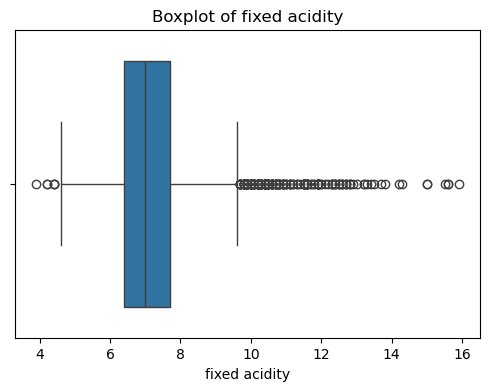

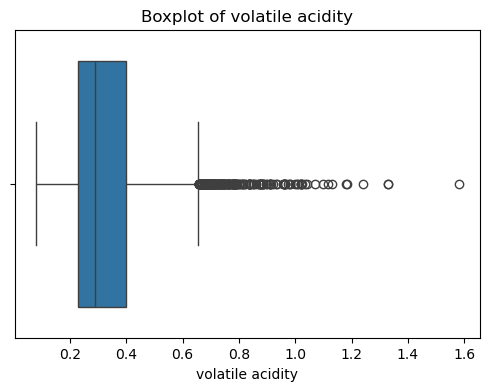

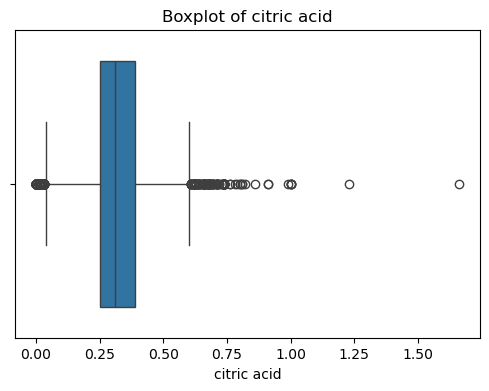

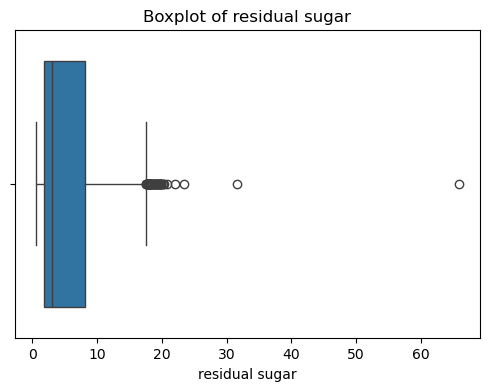

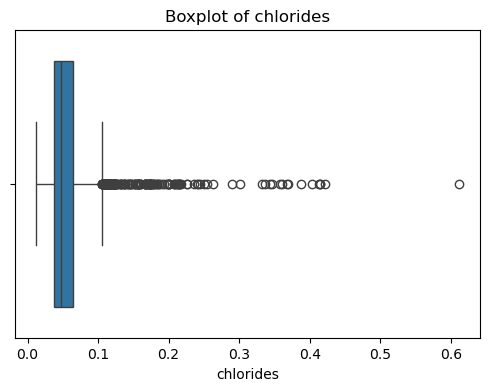

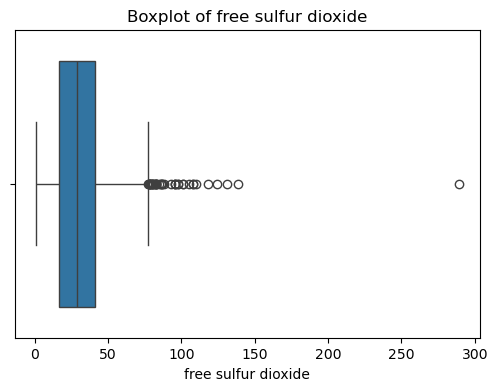

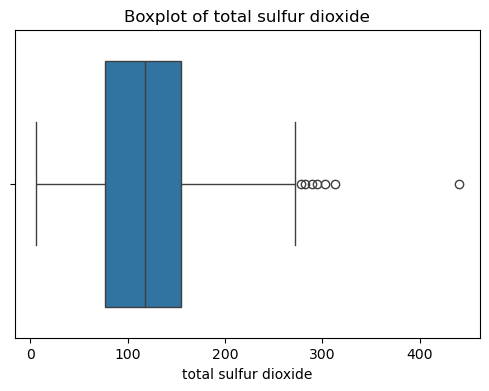

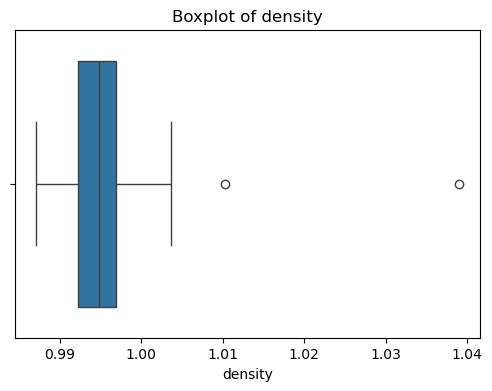

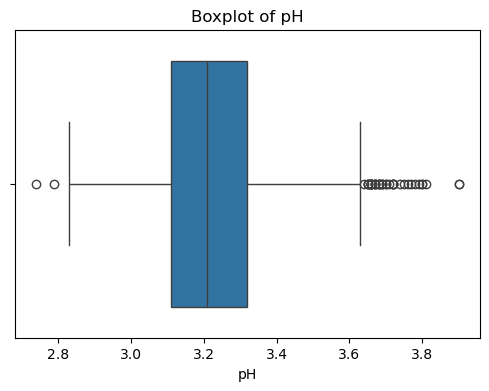

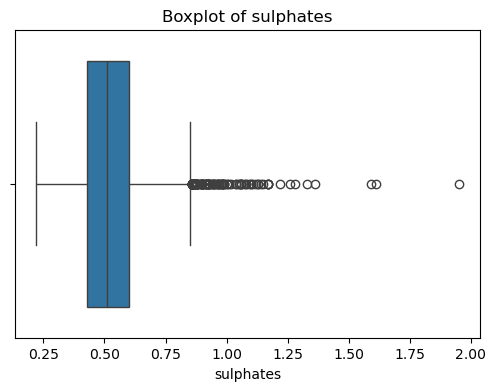

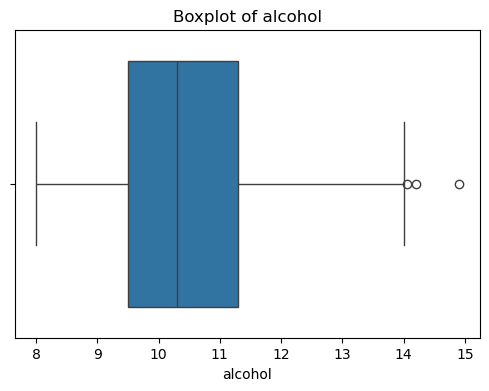

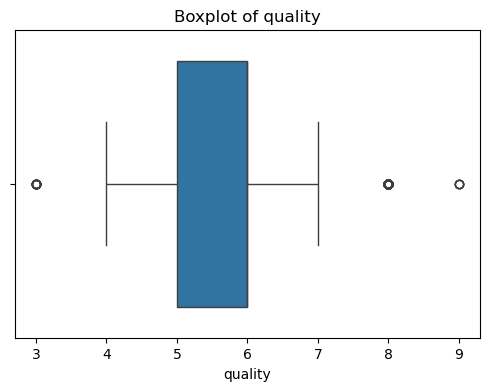

In [5]:

# Boxplots for each numeric variable

for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


## 1.2 Check for balance/imbalance of class labels

In [6]:

target = "color"


In [7]:

class_counts = df[target].value_counts()
class_counts


color
white    3134
red      1023
Name: count, dtype: int64

In [8]:

class_percentages = df[target].value_counts(normalize=True) * 100
class_percentages


color
white    75.390907
red      24.609093
Name: proportion, dtype: float64

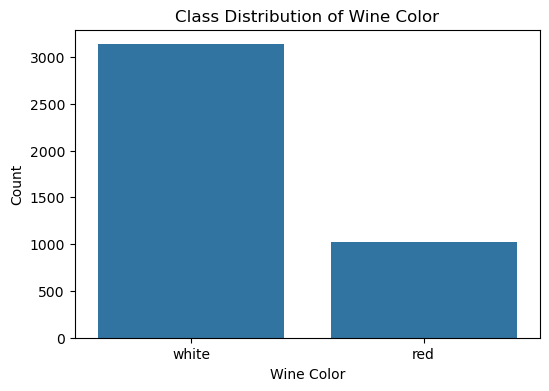

In [9]:

plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=df)
plt.title("Class Distribution of Wine Color")
plt.xlabel("Wine Color")
plt.ylabel("Count")
plt.show()


## 1.3 Split data + Scale data

In [10]:

# Split into features (X) and target (y)

target = "color"

X = df.drop(columns=[target])
y = df[target]

# Train/Test split (stratified)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Keep class proportions
)


# Feature scaling (fit on train, transform both)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # Fit ONLY on train
X_test_scaled = scaler.transform(X_test)         # Transform test with same scaler

# Quick check: shapes
X_train_scaled.shape, X_test_scaled.shape


((3325, 12), (832, 12))

## 1.4 Use stratified splits to preserver class proportions

In [11]:

# Check class proportions in full / train / test


# Full dataset proportions
full_props = y.value_counts(normalize=True)

# Train set proportions
train_props = y_train.value_counts(normalize=True)

# Test set proportions
test_props = y_test.value_counts(normalize=True)

# Combine into one table
class_distribution_check = pd.DataFrame({
    "full": full_props,
    "train": train_props,
    "test": test_props
}).fillna(0)

# Show as percentages
(class_distribution_check * 100).round(2)


,full,train,test
color,,,
white,75.39,75.4,75.36
red,24.61,24.6,24.64


# 2. Model Configuration

## 2.1 Null-Model

In [12]:

# Determine majority class from training data

majority_class = y_train.value_counts().idxmax()
majority_class


'white'

In [13]:

# Null model predictions (always predict majority class)

y_pred_null = np.full(shape=y_test.shape, fill_value=majority_class)


In [14]:

# Null model accuracy

null_accuracy = accuracy_score(y_test, y_pred_null)
null_accuracy


0.7536057692307693

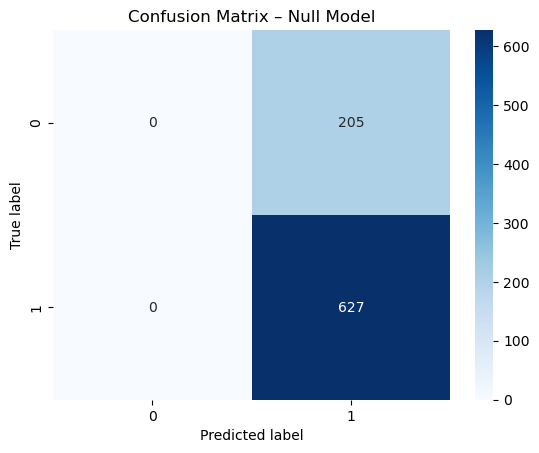

In [15]:

# Confusion matrix for null model

cm_null = confusion_matrix(y_test, y_pred_null)

sns.heatmap(cm_null, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Null Model")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


In [16]:

# Precision, Recall, F1-score for Null Model

print(classification_report(y_test, y_pred_null))


              precision    recall  f1-score   support

         red       0.00      0.00      0.00       205
       white       0.75      1.00      0.86       627

    accuracy                           0.75       832
   macro avg       0.38      0.50      0.43       832
weighted avg       0.57      0.75      0.65       832



c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 2.2 Polynomial SVM

In [17]:

# Polynomial SVM: train and evaluate multiple settings

# Candidate hyperparameters to try
C_values = [0.1, 1, 10, 100]
degrees = [2, 3, 4]

results = []

for C in C_values:
    for deg in degrees:
        # Create and train the model
        poly_svm = SVC(
            kernel="poly",
            C=C,
            degree=deg,
            gamma="scale",   # Good default for most cases
            coef0=1,         # Often helpful for polynomial kernels
            random_state=42
        )
        poly_svm.fit(X_train_scaled, y_train)

        # Predict on test set
        y_pred = poly_svm.predict(X_test_scaled)

        # Evaluate
        acc = accuracy_score(y_test, y_pred)

        results.append({
            "C": C,
            "degree": deg,
            "accuracy": acc
        })

# Show results table (sorted)
results_df = pd.DataFrame(results).sort_values(by="accuracy", ascending=False)
results_df


,C,degree,accuracy
4,1.0,3,0.997596
0,0.1,2,0.996394
2,0.1,4,0.996394
1,0.1,3,0.996394
3,1.0,2,0.996394
5,1.0,4,0.995192
6,10.0,2,0.993990
7,10.0,3,0.992788
8,10.0,4,0.990385
10,100.0,3,0.990385


Best Polynomial SVM settings:
C = 1.0, degree = 3

Classification report:
              precision    recall  f1-score   support

         red       1.00      1.00      1.00       205
       white       1.00      1.00      1.00       627

    accuracy                           1.00       832
   macro avg       1.00      1.00      1.00       832
weighted avg       1.00      1.00      1.00       832



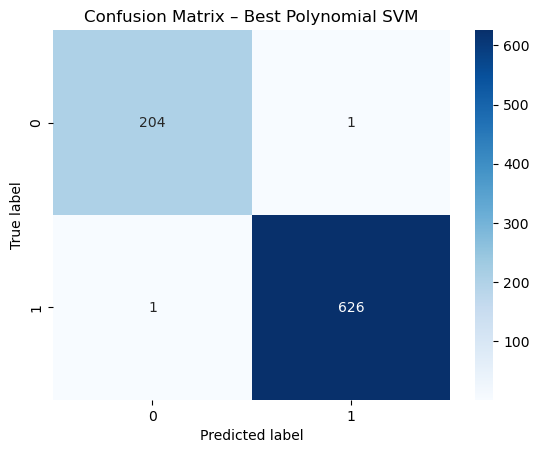

Accuracy (Polynomial SVM): 0.9976
Accuracy (Null Model):     0.7536


In [18]:
# -----------------------------
# Pick the best model based on accuracy (simple baseline choice)
# -----------------------------
best_row = results_df.iloc[0]

best_C = float(best_row["C"])             # C can be float
best_degree = int(best_row["degree"])     # degree MUST be int

best_poly_svm = SVC(
    kernel="poly",
    C=best_C,
    degree=best_degree,
    gamma="scale",
    coef0=1,
    random_state=42
)

best_poly_svm.fit(X_train_scaled, y_train)
y_pred_best = best_poly_svm.predict(X_test_scaled)

# -----------------------------
# Detailed evaluation
# -----------------------------
print("Best Polynomial SVM settings:")
print(f"C = {best_C}, degree = {best_degree}\n")

print("Classification report:")
print(classification_report(y_test, y_pred_best))

cm_poly = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Best Polynomial SVM")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

poly_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (Polynomial SVM): {poly_accuracy:.4f}")
print(f"Accuracy (Null Model):     {null_accuracy:.4f}")


## Grid Search for finding best parameters

In [19]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Pipeline: scale -> SVM
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly", coef0=1, random_state=42))
])

# Parameter grid (start small, but meaningful)
param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__degree": [2, 3, 4],
    "svm__gamma": ["scale", "auto"]
}

# Stratified CV to preserve class proportions
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1_macro",   # robust choice for imbalance
    cv=cv,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(coef0=1, kernel='poly',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100], 'svm__degree': [2, 3, 4],
                         'svm__gamma': ['scale', 'auto']},
             scoring='f1_macro')

In [20]:

# Best parameters and best CV score

print("Best parameters:", grid_search.best_params_)
print("Best CV f1_macro:", grid_search.best_score_)


Best parameters: {'svm__C': 1, 'svm__degree': 2, 'svm__gamma': 'scale'}
Best CV f1_macro: 0.9943093677927208


Classification report (Grid Search best model):
              precision    recall  f1-score   support

         red       1.00      0.99      0.99       205
       white       1.00      1.00      1.00       627

    accuracy                           1.00       832
   macro avg       1.00      0.99      1.00       832
weighted avg       1.00      1.00      1.00       832



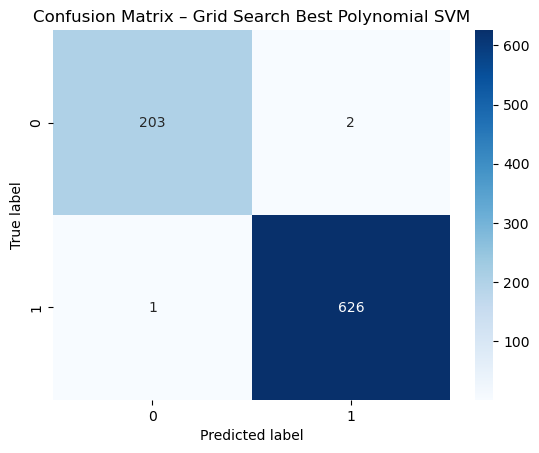

Test Accuracy (Grid Search): 0.9964
Test Accuracy (Null Model):  0.7536


In [21]:

# Evaluate best model on test set

best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test)

print("Classification report (Grid Search best model):")
print(classification_report(y_test, y_pred_grid))

cm_grid = confusion_matrix(y_test, y_pred_grid)

sns.heatmap(cm_grid, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Grid Search Best Polynomial SVM")
offer = None
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

test_acc = accuracy_score(y_test, y_pred_grid)
print(f"Test Accuracy (Grid Search): {test_acc:.4f}")
print(f"Test Accuracy (Null Model):  {null_accuracy:.4f}")


## 3. Evaluation of the Model against the unseen data

In [22]:

# Load holdout datasets

X_holdout = pd.read_csv("../datasets/wine_holdout_X(in).csv")
y_holdout = pd.read_csv("../datasets/wine_holdout_y(in).csv")


In [23]:

# Separate ID and features

holdout_ids = X_holdout["wine_id"]
X_holdout_features = X_holdout.drop(columns=["wine_id"])


In [24]:
# -----------------------------
# Predict holdout labels
# -----------------------------
y_holdout_pred = best_model.predict(X_holdout_features)


In [25]:

# Create prediction DataFrame

pred_df = pd.DataFrame({
    "wine_id": holdout_ids,
    "predicted_color": y_holdout_pred
})


# Merge with true labels using ID

holdout_results = y_holdout.merge(
    pred_df,
    on="wine_id",
    how="inner"
)

# Quick sanity check
holdout_results.head()



,wine_id,color,predicted_color
0,4622,white,white
1,3287,white,white
2,4592,white,white
3,4833,red,red
4,1904,red,red


In [26]:

# Evaluation on holdout set

print("Classification Report – Holdout Set:")
print(
    classification_report(
        holdout_results["color"],
        holdout_results["predicted_color"]
    )
)

holdout_accuracy = accuracy_score(
    holdout_results["color"],
    holdout_results["predicted_color"]
)

print(f"Holdout Accuracy: {holdout_accuracy:.4f}")


Classification Report – Holdout Set:
              precision    recall  f1-score   support

         red       1.00      0.98      0.99       256
       white       0.99      1.00      1.00       784

    accuracy                           1.00      1040
   macro avg       1.00      0.99      0.99      1040
weighted avg       1.00      1.00      1.00      1040

Holdout Accuracy: 0.9952


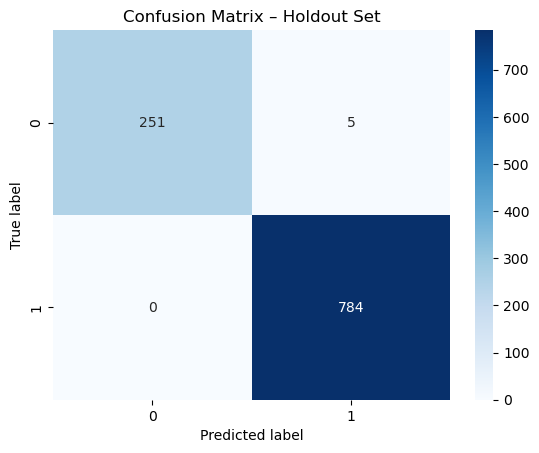

In [27]:

# Confusion matrix (holdout)

cm_holdout = confusion_matrix(
    holdout_results["color"],
    holdout_results["predicted_color"]
)

sns.heatmap(cm_holdout, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Holdout Set")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
